In [47]:
import pandas as pd
import matplotlib.pylab as plt

### Load data

In [48]:
df = pd.read_csv("./input/Superstore.csv", encoding='latin1')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [50]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,9/11/2013,12/11/2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,9/11/2013,12/11/2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,6/13/2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11/10/2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11/10/2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### filter data for more specific category (Optional)

In [51]:
#df = df[df['Category'] == 'Office Supplies']

### Preprocessing

In [52]:
df_Pre = df[['Order Date', 'Sales']]

In [53]:
df_Pre['Order Date'] = pd.to_datetime(df_Pre['Order Date'], errors='coerce')
df_Pre['Sales'] = df_Pre['Sales'].abs()

C:\Users\chill\AppData\Local\Temp\ipykernel_17536\2713499805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Pre['Order Date'] = pd.to_datetime(df_Pre['Order Date'], errors='coerce')
C:\Users\chill\AppData\Local\Temp\ipykernel_17536\2713499805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Pre['Sales'] = df_Pre['Sales'].abs()


In [54]:
df_Pre.rename(columns={"Order Date": "ds", "Sales": "y"}, inplace=True)
df_Pre = df_Pre.groupby(by='ds').sum()

C:\Users\chill\AppData\Local\Temp\ipykernel_17536\1270896185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Pre.rename(columns={"Order Date": "ds", "Sales": "y"}, inplace=True)


In [55]:
df_Pre

,y
ds,
2011-01-02,290.6660
2011-01-03,2203.1510
2011-01-04,119.8880
2011-01-06,5188.5200
2011-01-07,601.0240
...,...
2014-12-27,814.5940
2014-12-28,177.6360
2014-12-29,1657.3508


In [56]:
df_Pre = df_Pre.sort_index()

### Finding missing date in dataset

In [57]:
full_range = pd.date_range(df_Pre.index.min(), df_Pre.index.max(), freq='D')
missing_dates = full_range.difference(df_Pre.index)

print("Missing dates:", missing_dates)
print("Count:", len(missing_dates))


Missing dates: DatetimeIndex(['2011-01-05', '2011-01-13', '2011-01-18', '2011-01-23',
               '2011-01-25', '2011-01-26', '2011-01-30', '2011-02-01',
               '2011-02-14', '2011-02-20',
               ...
               '2014-09-08', '2014-09-28', '2014-10-08', '2014-10-19',
               '2014-10-26', '2014-11-01', '2014-11-05', '2014-12-01',
               '2014-12-10', '2014-12-13'],
              dtype='datetime64[ns]', length=222, freq=None)
Count: 222


### Adding filling dates into index and filling with Interpolation

In [58]:
# Reindex to include missing dates
df_Pre = df_Pre.reindex(full_range)
df_Pre.index.name = 'ds'
df_Pre.head()

,y
ds,
2011-01-02,290.666
2011-01-03,2203.151
2011-01-04,119.888
2011-01-05,NaN
2011-01-06,5188.520


In [59]:
df_Pre = df_Pre.interpolate(method='linear')
df_Pre.head()

,y
ds,
2011-01-02,290.666
2011-01-03,2203.151
2011-01-04,119.888
2011-01-05,2654.204
2011-01-06,5188.520


<Axes: xlabel='ds'>

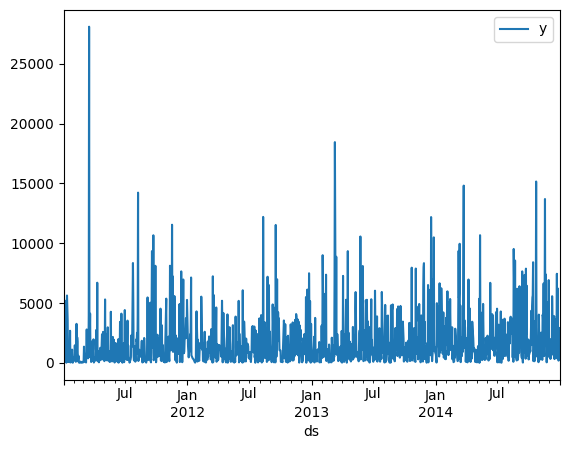

In [60]:
df_Pre.plot()

## Identify Outliers 

### IQR Method

In [61]:
Q1 = df_Pre['y'].quantile(0.25)
Q3 = df_Pre['y'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df_Pre[(df_Pre['y'] < lower) | (df_Pre['y'] > upper)]


### Z-score

In [62]:
df_Pre['z'] = (df_Pre['y'] - df_Pre['y'].mean()) / df_Pre['y'].std()
outliers = df_Pre[df_Pre['z'].abs() > 3]


### Seasonal Decompose

In [63]:
df_Pre

,y,z
ds,,
2011-01-02,290.6660,-0.687498
2011-01-03,2203.1510,0.179818
2011-01-04,119.8880,-0.764946
2011-01-05,2654.2040,0.384372
2011-01-06,5188.5200,1.533690
...,...,...
2014-12-27,814.5940,-0.449895
2014-12-28,177.6360,-0.738757
2014-12-29,1657.3508,-0.067703


In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_Pre['y'], model='additive', period=7)
resid = result.resid

outliers = resid[resid.abs() > 3 * resid.std()]


In [65]:
outliers.head

<bound method NDFrame.head of ds
2011-03-18    22076.614960
2011-08-09    10681.858802
2011-09-19     5715.023754
2011-09-23     7202.944131
2011-09-29     6297.099993
2011-11-17     7591.802065
2012-08-11    10014.065240
2012-09-17     8031.825611
2013-02-02     5967.280812
2013-03-10    12393.377733
2013-04-03     6013.557518
2013-04-17     7054.901518
2013-05-24     7223.056388
2013-10-22     6000.815659
2013-11-03     6543.635018
2013-12-18     8916.230946
2013-12-26     6951.791993
2014-03-24     9525.076183
2014-05-11     7709.050161
2014-08-18     6501.651611
2014-10-23    11034.761322
2014-11-18     8909.057345
Name: resid, dtype: float64>

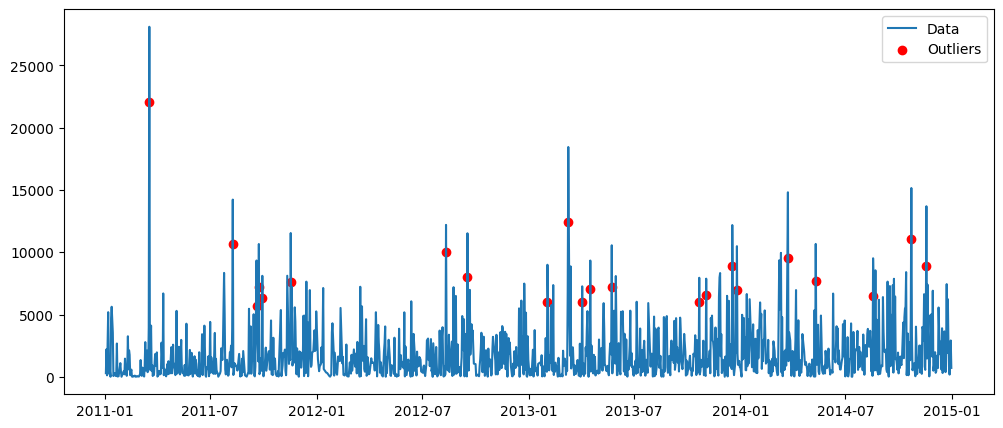

In [66]:
plt.figure(figsize=(12,5))
plt.plot(df_Pre.index, df_Pre['y'], label='Data')
plt.scatter(outliers.index, outliers, color='red', label='Outliers')
plt.legend()
plt.show()


### Fix outliers with interpolation idenfied with Seasonal Decompose

In [67]:
df_Pre.loc[outliers.index, 'y'] = float('nan')

df_Pre['y'] = df_Pre['y'].interpolate(method='time')

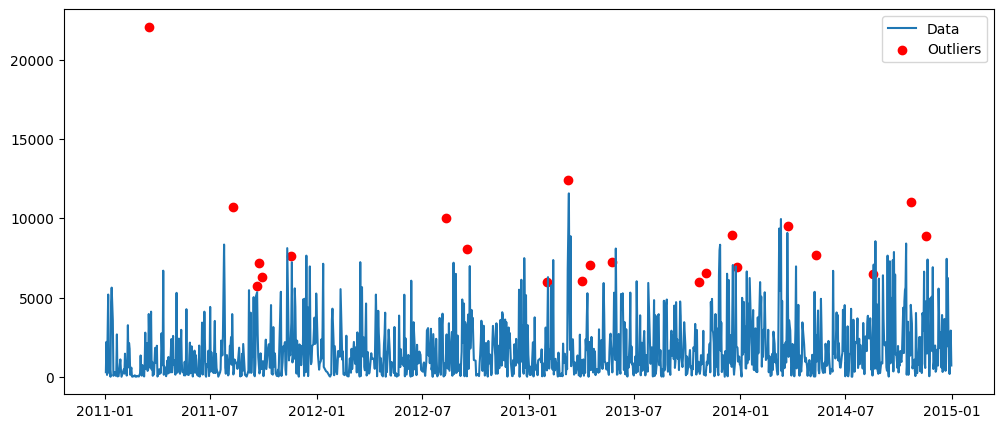

In [68]:
plt.figure(figsize=(12,5))
plt.plot(df_Pre.index, df_Pre['y'], label='Data')
plt.scatter(outliers.index, outliers, color='red', label='Outliers')
plt.legend()
plt.show()

### Check time series in Stationary or not

In [69]:
from statsmodels.tsa.stattools import adfuller

In [70]:
result = adfuller(df_Pre['y'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -17.284059934524095
p-value: 5.758200333929889e-30


In [71]:
# df_Pre['Salesdiff'] = df_Pre['Sales'].diff(periods=365)
# df_Pre.info()

In [72]:
df_Pre.drop(columns=['z'], inplace=True)
df_Pre.head()

,y
ds,
2011-01-02,290.666
2011-01-03,2203.151
2011-01-04,119.888
2011-01-05,2654.204
2011-01-06,5188.520


In [73]:
#df_Pre['Salesdiff'].bfill(inplace=True)

In [74]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

### Additive was most suitable since there was less noise residuals

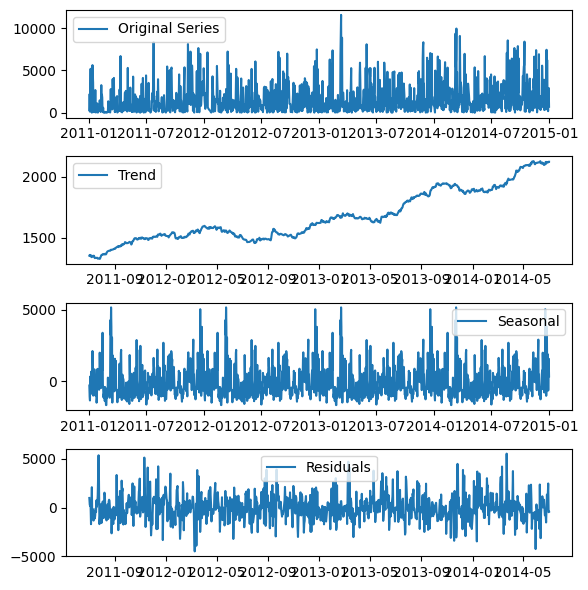

In [75]:
r = seasonal_decompose(df_Pre['y'], model='additive', period=365)
t = r.trend.dropna()
s = r.seasonal.dropna()
rsdl = r.resid.dropna()

plt.figure(figsize=(6,6))

plt.subplot(4, 1, 1)
plt.plot(df_Pre['y'], label='Original Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(t, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(s, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(rsdl, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()

### ACF and PACF

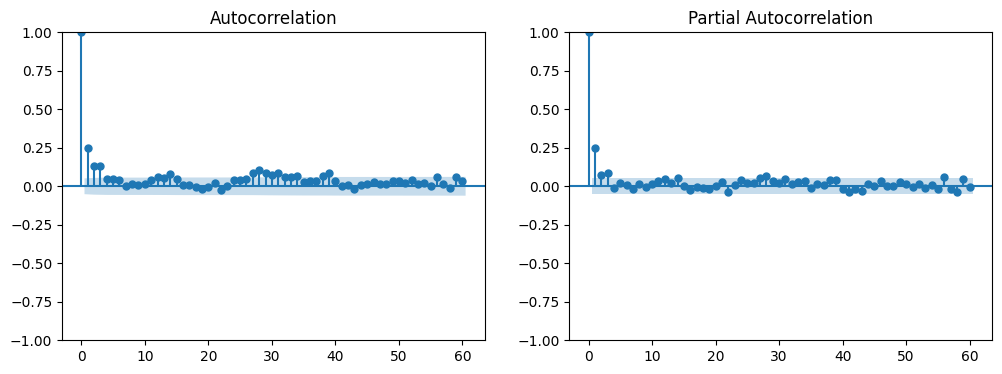

In [76]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))
plot_acf(df_Pre['y'], lags=60, ax=axs[0])
plot_pacf(df_Pre['y'], lags=60, ax=axs[1])
plt.show()


In [77]:
df_Pre.reset_index(inplace=True)

### Train/Test dataset Split

In [78]:
forecast_steps = 31
train = df_Pre[:-forecast_steps]
test = df_Pre[-forecast_steps:]

In [79]:
test

,ds,y
1429,2014-12-01,866.7020
1430,2014-12-02,1241.5160
1431,2014-12-03,1973.7080
1432,2014-12-04,319.8060
1433,2014-12-05,449.4690
1434,2014-12-06,1580.8940
1435,2014-12-07,1728.8920
1436,2014-12-08,708.7260
1437,2014-12-09,5564.0060
1438,2014-12-10,3689.6120


### SARIMA Model fit/Summary

In [80]:
s = 7
model = SARIMAX(train['y'], order=(0,0,0), seasonal_order=(1,0,1,s), trend='c')
res = model.fit(disp=False)
print(res.summary())

                                 SARIMAX Results                                 
Dep. Variable:                         y   No. Observations:                 1429
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood              -12698.281
Date:                   Mon, 15 Dec 2025   AIC                          25404.563
Time:                           03:51:17   BIC                          25425.622
Sample:                                0   HQIC                         25412.427
                                  - 1429                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3397.6260     94.678     35.886      0.000    3212.060    3583.192
ar.S.L7       -1.0000      0.062    -16.165      0.000      -1.121      -0.879
ma.S.L7        1.0000      0

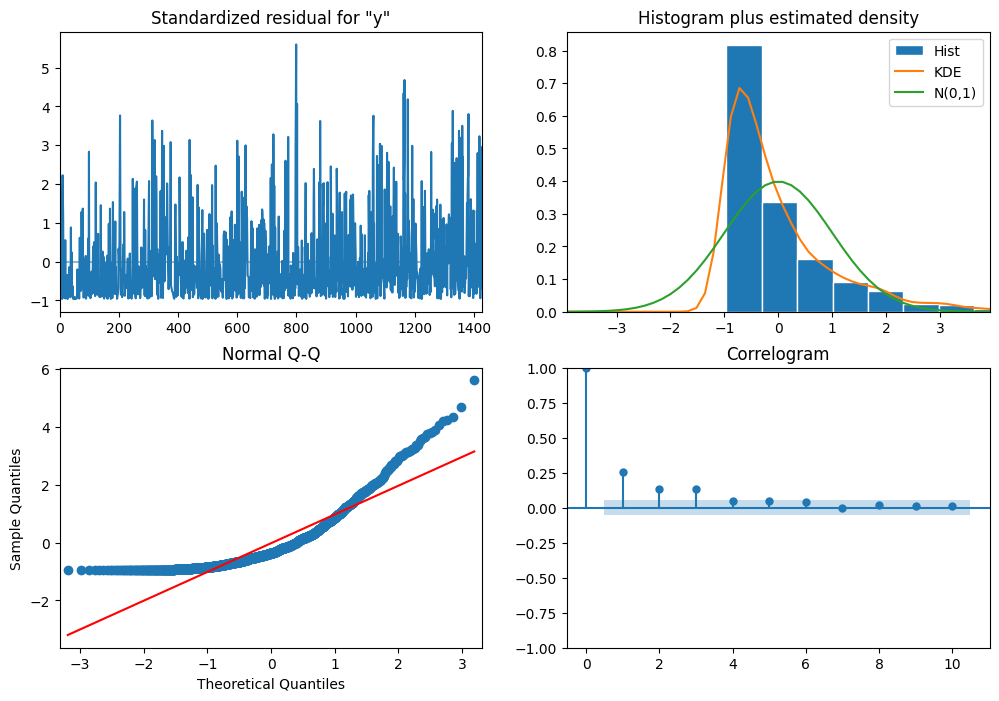

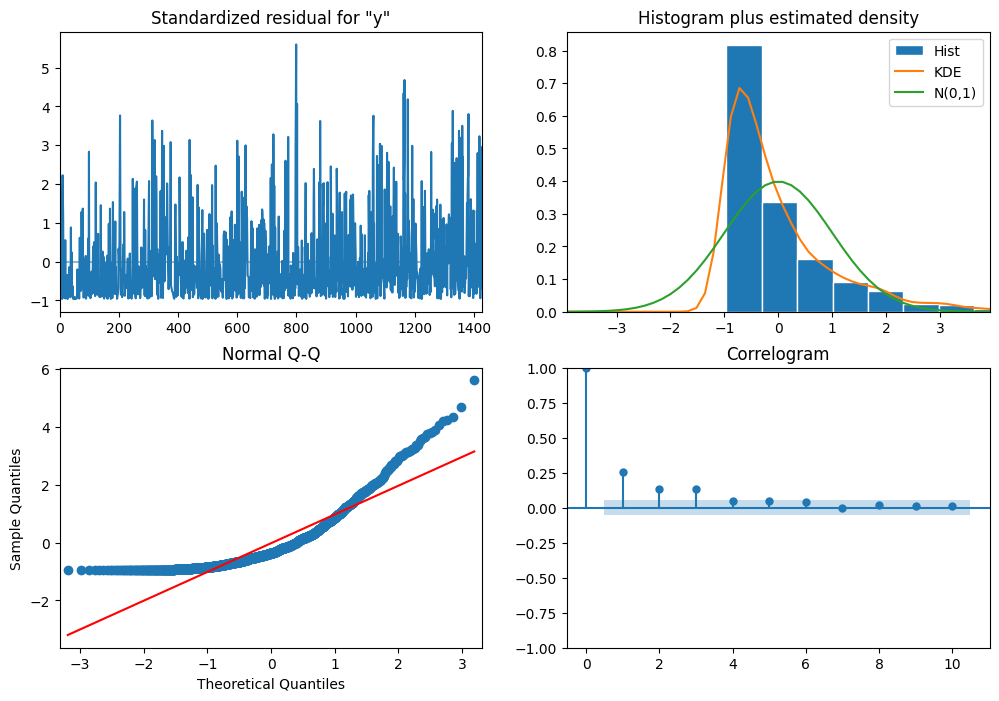

In [81]:
res.plot_diagnostics(figsize=(12,8))

#### If you need future Dates following cell need to run and adjust. Since I am using Test set to compare I will comment out

In [82]:
#future_dates = pd.date_range(start='2015-01-01', end='2015-6-30', freq='D')
#future_df = pd.DataFrame({'ds': future_dates})

In [83]:
forecast = res.get_forecast(steps=len(test))
forecast_df = forecast.conf_int()

In [84]:
forecast_df['forecast'] = forecast.predicted_mean

In [85]:
forecast_df.head()

,lower y,upper y,forecast
1429,-1755.811171,5153.534962,1698.861896
1430,-1755.747178,5153.598954,1698.925888
1431,-1755.844597,5153.501536,1698.828469
1432,-1755.887992,5153.458141,1698.785075
1433,-1755.840193,5153.505940,1698.832874


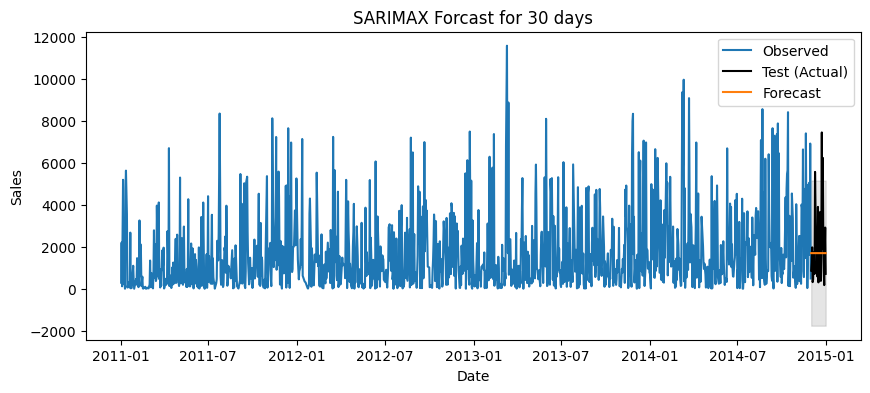

In [86]:
plt.figure(figsize=(10, 4))
plt.plot(train['ds'], train['y'], label='Observed')
plt.plot(test['ds'], test['y'], label='Test (Actual)', color='black')
plt.plot(test['ds'], forecast_df['forecast'], label='Forecast')
plt.fill_between(test['ds'], forecast_df['lower y'], forecast_df['upper y'], color='k', alpha=0.1)
plt.title('SARIMAX Forcast for 30 days')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

### Model Accuracy

In [87]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test['y'], forecast.predicted_mean[:len(test)])
rmse = np.sqrt(mean_squared_error(test['y'], forecast.predicted_mean[:len(test)]))

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 1237.7850646714123
RMSE: 1799.3696892852547


In [88]:
df_Pre.to_excel("./output/df_out.xlsx", index=False)

### Checking with auto Arima to identify best model params

In [89]:
from pmdarima import auto_arima

# y must be your sales series with a proper datetime index
y = train['y']

# Auto ARIMA with weekly seasonality
auto_model = auto_arima(
    y,
    start_p=0, max_p=3,
    start_q=0, max_q=3,
    d=0,               # ADF already showed stationary
    start_P=0, max_P=2,
    start_Q=0, max_Q=2,
    D=0,               # seasonal differencing not needed (additive)
    seasonal=True,
    m=7,               # weekly seasonality
    trend='c',
    information_criterion='aic',
    stepwise=True,
    suppress_warnings=True,
    trace=True
)

print(auto_model.summary())


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=25399.541, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=25307.431, Time=0.12 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=25323.519, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=25399.541, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=25305.701, Time=0.03 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=25307.414, Time=0.08 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=25309.404, Time=0.33 sec
 ARIMA(2,0,0)(0,0,0)[7] intercept   : AIC=25299.674, Time=0.05 sec
 ARIMA(2,0,0)(1,0,0)[7] intercept   : AIC=25301.260, Time=0.18 sec
 ARIMA(2,0,0)(0,0,1)[7] intercept   : AIC=25301.253, Time=0.12 sec
 ARIMA(2,0,0)(1,0,1)[7] intercept   : AIC=25303.238, Time=0.61 sec
 ARIMA(3,0,0)(0,0,0)[7] intercept   : AIC=25291.156, Time=0.07 sec
 ARIMA(3,0,0)(1,0,0)[7] intercept   : AIC=25292.627, Time=0.22 sec
 ARIMA(3,0,0)(0,0,1)[7] intercept   : AIC=25292.650, Time=0.15 sec
 ARIMA(3,0,0)(1,0,1

In [90]:
best_model = auto_model.fit(y)

In [91]:
forecast = best_model.predict(n_periods=len(test))

### There was no significant different in results between autoArima and SARIMA

In [92]:
# Convert forecast to a Pandas Series with the same index as test
forecast_series = pd.Series(forecast, index=test.index)

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test['y'], forecast_series)
rmse = np.sqrt(mean_squared_error(test['y'], forecast_series))

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 1257.3653875160076
RMSE: 1814.7811550002707
